In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [47]:
df = pd.read_csv('Fir_Details_final_refined.csv')

C:\Users\dutta\AppData\Local\Temp\ipykernel_28864\512808068.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Fir_Details_final_refined.csv')


In [48]:
df

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,Direction,Day_Offence_From,Hour_Offence_From,Minute_Offence_From,Day_Offence_To,Hour_Offence_To,Minute_Offence_To,Day_FIR_Reg,Hour_FIR_Reg,Minute_FIR_Reg
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00,2015-12-27 12:05:00,2016-01-05 11:00:00,05/01/2016,...,WEST,27,12,0,27.0,12.0,5.0,5,11,0
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00,2016-01-12 17:35:00,2016-01-12 19:00:00,12/01/2016,...,WEST,12,17,30,12.0,17.0,35.0,12,19,0
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00,2016-01-12 17:50:00,2016-01-12 19:30:00,12/01/2016,...,EAST,12,17,45,12.0,17.0,50.0,12,19,30
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00,2016-01-14 21:35:00,2016-01-15 14:00:00,15/01/2016,...,WEST,14,21,30,14.0,21.0,35.0,15,14,0
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00,2016-01-18 15:05:00,2016-01-18 19:30:00,18/01/2016,...,NORTH,18,15,0,18.0,15.0,5.0,18,19,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694178,Yadgir,Yadgiri Women PS,0002/2024,1,2024,1,2024-01-10 05:30:00,2024-01-10 21:30:00,2024-01-11 21:30:00,11/01/2024,...,EAST,10,5,30,10.0,21.0,30.0,11,21,30
1694179,Yadgir,Yadgiri Women PS,0003/2024,1,2024,1,2024-01-19 22:30:00,2024-01-19 22:35:00,2024-01-29 19:30:00,29/01/2024,...,WEST,19,22,30,19.0,22.0,35.0,29,19,30
1694180,Yadgir,Yadgiri Women PS,0004/2024,1,2024,2,2024-02-06 15:42:00,2024-02-06 15:45:00,2024-02-07 17:45:00,07/02/2024,...,EAST,6,15,42,6.0,15.0,45.0,7,17,45
1694181,Yadgir,Yadgiri Women PS,0005/2024,1,2024,2,2024-02-19 12:10:00,2024-02-19 12:15:00,2024-02-24 17:00:00,24/02/2024,...,WEST,19,12,10,19.0,12.0,15.0,24,17,0


In [49]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg'],
      dtype='object')

In [50]:
df['FIR Type'] = df['FIR Type'].replace({'Heinous': 1, 'Non Heinous': 0})

In [51]:
df['FIR Type'].unique()

array([0, 1], dtype=int64)

In [52]:
df['UnitName'].unique().size

1055

In [53]:
import pandas as pd


df['UnitName_encoded'], mapping_index = pd.factorize(df['UnitName'])

mapping_dict = {v: k for v, k in enumerate(mapping_index)}


print(df['UnitName_encoded'].unique().size)

print(mapping_dict)

1055
{0: 'Amengad PS', 1: 'Badami PS', 2: 'Bagalkot CEN Crime PS', 3: 'Bagalkot Rural PS', 4: 'Bagalkot Town PS', 5: 'Bagalkot Traffic PS', 6: 'Bagalkot Women PS', 7: 'Banahatti PS', 8: 'Bilagi PS', 9: 'Guledagudda PS', 10: 'Hungunda PS', 11: 'Ilakal PS', 12: 'Ilakal Rural PS', 13: 'Jamakhandi Rural PS', 14: 'Jamakhandi Town PS', 15: 'Kaladagi PS', 16: 'Kerur PS', 17: 'Lokapur PS', 18: 'Mahalingapur PS', 19: 'Mudhol PS', 20: 'Navanagara PS', 21: 'Savalgi PS', 22: 'Teradal PS', 23: 'APMC Yard PS', 24: 'Ballari CEN Crime PS', 25: 'Ballari Women PS', 26: 'Bellary Rural PS', 27: 'Bellary Traffic PS', 28: 'Brucepet PS', 29: 'Choranuru PS', 30: 'Cowlbazar PS', 31: 'Gadiganur PS', 32: 'Gandhinagar PS', 33: 'Hatcholli PS', 34: 'Kampli  PS', 35: 'Kuduthini PS', 36: 'Kurugod PS', 37: 'Moka PS', 38: 'P.D. Halli PS', 39: 'Sandur PS', 40: 'Sirigeri PS', 41: 'Siruguppa PS', 42: 'Tekkalkota PS', 43: 'Thoranagal PS', 44: 'Bagewadi PS', 45: 'Belagavi City CEN Crime PS', 46: 'Belagavi City Women PS', 47

In [173]:
import json

# Assuming mapping_dict is already defined as shown above
with open('mapping_dict.json', 'w') as file:
    json.dump(mapping_dict, file)


In [54]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg',
       'UnitName_encoded'],
      dtype='object')

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Combine 'UnitName' and 'Beat_Name' into a new column
df['Unit_Beat'] = df['UnitName'] + '_' + df['Beat_Name']

# Apply label encoding to the combined column
encoder = LabelEncoder()
df['Unit_Beat_encoded'] = encoder.fit_transform(df['Unit_Beat'])

# Store the mapping in a dictionary
unit_beat_mapping = {index: label for index,
                     label in enumerate(encoder.classes_)}

# Now, 'unit_beat_mapping' contains each unique 'Unit_Beat' combination's encoded value

In [56]:
unit_beat_mapping

{0: 'APMC Navanagar_5',
 1: 'APMC Navanagar_6',
 2: 'APMC Navanagar_7',
 3: 'APMC PS_1',
 4: 'APMC PS_2',
 5: 'APMC PS_3',
 6: 'APMC PS_4',
 7: 'APMC PS_5',
 8: 'APMC Yard PS_1 BEAT',
 9: 'APMC Yard PS_1st beat',
 10: 'APMC Yard PS_2 nd beat',
 11: 'APMC Yard PS_3 beat',
 12: 'APMC Yard PS_BEAT 10',
 13: 'APMC Yard PS_BEAT 11',
 14: 'APMC Yard PS_BEAT 12',
 15: 'APMC Yard PS_BEAT 13',
 16: 'APMC Yard PS_BEAT 14',
 17: 'APMC Yard PS_BEAT 15',
 18: 'APMC Yard PS_BEAT 16',
 19: 'APMC Yard PS_BEAT 17',
 20: 'APMC Yard PS_BEAT 18',
 21: 'APMC Yard PS_BEAT 19',
 22: 'APMC Yard PS_BEAT 20',
 23: 'APMC Yard PS_BEAT 21',
 24: 'APMC Yard PS_BEAT 22',
 25: 'APMC Yard PS_BEAT 23',
 26: 'APMC Yard PS_BEAT 24',
 27: 'APMC Yard PS_BEAT 25',
 28: 'APMC Yard PS_BEAT 26',
 29: 'APMC Yard PS_BEAT 27',
 30: 'APMC Yard PS_BEAT 28',
 31: 'APMC Yard PS_BEAT 29',
 32: 'APMC Yard PS_BEAT 30',
 33: 'APMC Yard PS_BEAT 31',
 34: 'APMC Yard PS_BEAT 32',
 35: 'APMC Yard PS_BEAT 33',
 36: 'APMC Yard PS_BEAT 34',
 37

In [57]:
df['Unit_Beat_encoded']

0            486
1            497
2            497
3            486
4            489
           ...  
1694178    18873
1694179    18874
1694180    18877
1694181    18873
1694182    18874
Name: Unit_Beat_encoded, Length: 1694183, dtype: int32

In [58]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg',
       'UnitName_encoded', 'Unit_Beat', 'Unit_Beat_encoded'],
      dtype='object')

In [59]:
df['UnitName'].unique()

array(['Amengad PS', 'Badami PS', 'Bagalkot CEN Crime PS', ...,
       'Yadgiri Town PS', 'Yadgiri Traffic PS', 'Yadgiri Women PS'],
      dtype=object)

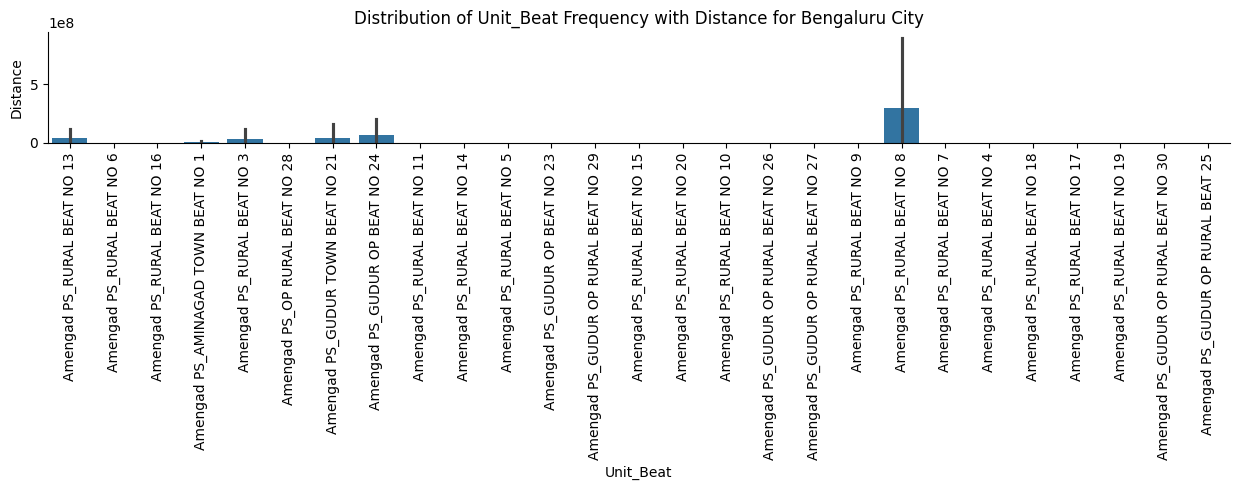

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for 'Bengaluru City'
bengaluru_city_df = df[df['UnitName'] == 'Amengad PS']

# Create the distribution plot
sns.catplot(x='Unit_Beat', y='Distance', kind='bar',
            data=bengaluru_city_df, aspect=2.5)
plt.title('Distribution of Unit_Beat Frequency with Distance for Bengaluru City')
plt.xticks(rotation=90)
plt.ylabel('Distance')
plt.xlabel('Unit_Beat')
plt.tight_layout()
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder

# Creating the label encoder instance
encoder = LabelEncoder()

# Fitting the encoder to the 'District_Name' column and transforming it to numerical format
df['District_Name_encoded'] = encoder.fit_transform(df['District_Name'])

# Creating the mapping dictionary from encoded values back to original district names
district_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Now, 'district_name_mapping' contains each unique 'District_Name' and its corresponding encoded value


In [62]:
df['District_Name_encoded']

0           0
1           0
2           0
3           0
4           0
           ..
1694178    40
1694179    40
1694180    40
1694181    40
1694182    40
Name: District_Name_encoded, Length: 1694183, dtype: int32

In [63]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg',
       'UnitName_encoded', 'Unit_Beat', 'Unit_Beat_encoded',
       'District_Name_encoded'],
      dtype='object')

In [64]:
df['Village_Area_Name'].unique().size

17002

In [65]:
encoder = LabelEncoder()

# Fitting the encoder to the 'District_Name' column and transforming it to numerical format
df['Village_Area_Name_encoded'] = encoder.fit_transform(df['Village_Area_Name'])

# Creating the mapping dictionary from encoded values back to original district names
Village_Area_Name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

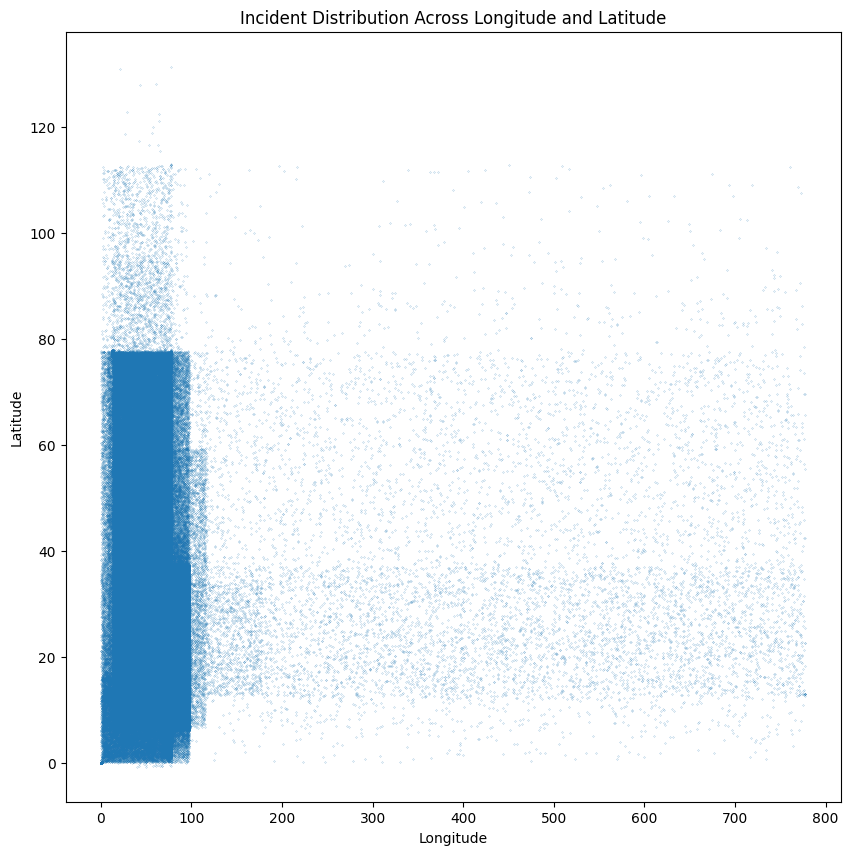

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(df['Longitude'], df['Latitude'], s=0.02)

# Set labels for x and y axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set title for the plot
plt.title('Incident Distribution Across Longitude and Latitude')

plt.show()


Text(0, 0.5, 'Longitude')

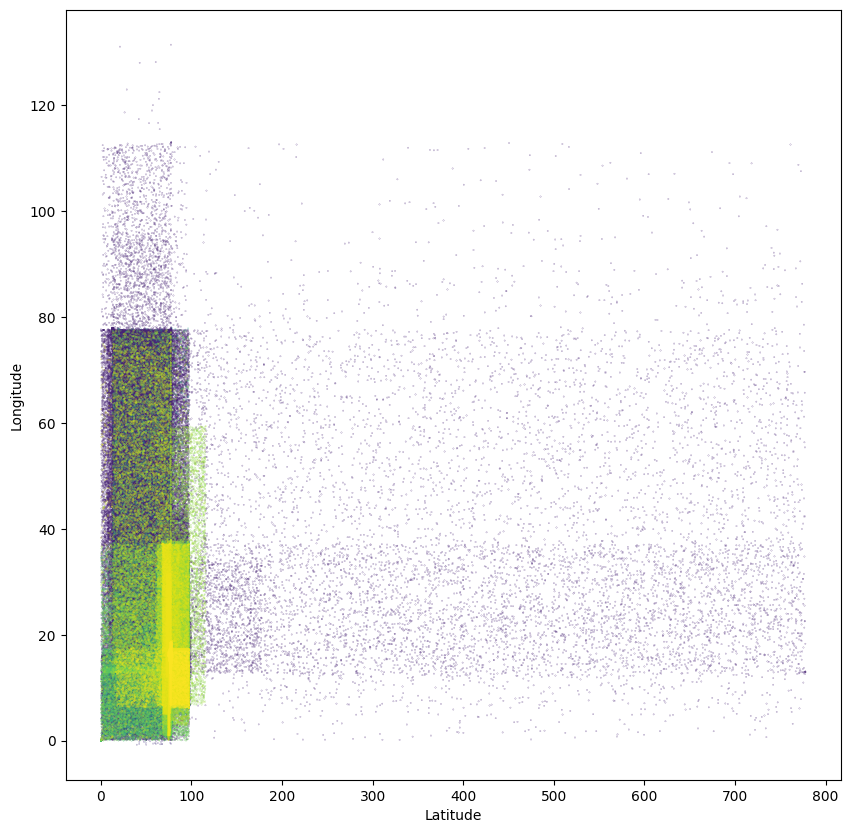

In [69]:
plt.figure(figsize=(10, 10))
plt.scatter(df['Longitude'], df['Latitude'],
            s=0.02, c=df['District_Name_encoded'])

axes = plt.gca()
axes.set_xlabel('Latitude')
axes.set_ylabel('Longitude')

In [70]:
top_15 = list(df['CrimeGroup_Name'].value_counts().head(15).index)
def filter_top_15(df):
    df2 = df[df['CrimeGroup_Name'] == 'THEFT']
    for crime in top_15[1:]:
        temp = df[df['CrimeGroup_Name'] == crime]
        df2 = pd.concat([df2, temp], ignore_index=True)  # Use pd.concat to concatenate DataFrames
    return df2

df2 = filter_top_15(df)  # the dataframe with all the data of only the top 10 crimes
df2.shape


(1316099, 56)

In [71]:
df.shape

(1694183, 56)

In [72]:
(1316099/1694183)*100

77.68340256040818

In [73]:
df2.head()

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,Hour_Offence_To,Minute_Offence_To,Day_FIR_Reg,Hour_FIR_Reg,Minute_FIR_Reg,UnitName_encoded,Unit_Beat,Unit_Beat_encoded,District_Name_encoded,Village_Area_Name_encoded
0,Bagalkot,Amengad PS,0009/2016,1,2016,1,2016-01-20 22:00:00,2016-01-20 22:05:00,2016-01-21 01:00:00,21/01/2016,...,22.0,5.0,21,1,0,0,Amengad PS_RURAL BEAT NO 3,494,0,156
1,Bagalkot,Amengad PS,0101/2016,1,2016,6,2016-06-15 23:00:00,2016-06-16 06:00:00,2016-06-16 12:30:00,16/06/2016,...,6.0,0.0,16,12,30,0,Amengad PS_GUDUR TOWN BEAT NO 21,482,0,4881
2,Bagalkot,Amengad PS,0125/2016,1,2016,7,2016-07-16 08:00:00,2016-07-16 15:00:00,2016-07-20 12:30:00,20/07/2016,...,15.0,0.0,20,12,30,0,Amengad PS_AMINAGAD TOWN BEAT NO 1,474,0,332
3,Bagalkot,Amengad PS,0128/2016,1,2016,7,2016-07-27 12:00:00,2016-07-27 15:00:00,2016-07-28 17:00:00,28/07/2016,...,15.0,0.0,28,17,0,0,Amengad PS_AMINAGAD TOWN BEAT NO 1,474,0,332
4,Bagalkot,Amengad PS,0142/2016,1,2016,8,2016-08-20 15:45:00,2016-08-20 15:50:00,2016-08-20 17:00:00,20/08/2016,...,15.0,50.0,20,17,0,0,Amengad PS_RURAL BEAT NO 3,494,0,156


In [74]:
df2.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg',
       'UnitName_encoded', 'Unit_Beat', 'Unit_Beat_encoded',
       'District_Name_encoded', 'Village_Area_Name_encoded'],
      dtype='object'

In [75]:
# Inspecting a few relevant features

df2[['FIR Type', 'Unit_Beat_encoded', 'District_Name_encoded','Village_Area_Name_encoded', 'Latitude', 'Longitude']].head()

,FIR Type,Unit_Beat_encoded,District_Name_encoded,Village_Area_Name_encoded,Latitude,Longitude
0,0,494,0,156,16.302590,75.958884
1,0,482,0,4881,15.976302,75.446488
2,0,474,0,332,15.878416,75.175773
3,0,474,0,332,16.148975,75.384383
4,0,494,0,156,15.508905,75.768786


In [128]:
cri5 = df2.groupby(['Month', 'Day_Offence_From', 'District_Name_encoded', 'Hour_Offence_From'], as_index=False).agg({"Accused Count": ["count", "sum"]})

# Rename the columns for clarity
cri5.columns = ['Month', 'Day_Offence_From', 'District_Name_encoded', 'Hour_Offence_From', 'Accused_Count_Count', 'Accused_Count_Sum']

print(cri5)

cri5 = cri5.sort_values(by=['District_Name_encoded'], ascending=False)
cri5.head()

        Month  Day_Offence_From  District_Name_encoded  Hour_Offence_From  \
0           1                 1                      0                  0   
1           1                 1                      0                  1   
2           1                 1                      0                  2   
3           1                 1                      0                  6   
4           1                 1                      0                  7   
...       ...               ...                    ...                ...   
254385     12                31                     40                 15   
254386     12                31                     40                 16   
254387     12                31                     40                 17   
254388     12                31                     40                 18   
254389     12                31                     40                 19   

        Accused_Count_Count  Accused_Count_Sum  
0                        2

,Month,Day_Offence_From,District_Name_encoded,Hour_Offence_From,Accused_Count_Count,Accused_Count_Sum
254389,12,31,40,19,2,8
39799,2,25,40,6,1,1
39809,2,25,40,17,4,2
39808,2,25,40,16,3,7
39807,2,25,40,15,3,3


In [144]:
print("Highest Crime Count at any district at any time point:", cri5["Accused_Count_Count"].max())
print("Lowest Crime Count at any district at any time point:", cri5["Accused_Count_Count"].min())

Highest Crime Count at any district at any time point: 742
Lowest Crime Count at any district at any time point: 1


In [145]:
print("Average no. of crimes per ditrict per time point :",round(cri5['Accused_Count_Count'].sum()/cri5.shape[0], 2),".")

Average no. of crimes per ditrict per time point : 5.17 .


In [146]:
import numpy as np
lower = np.mean(cri5['Accused_Count_Sum'])-0.75*np.std(cri5['Accused_Count_Sum'])
higher = np.mean(cri5['Accused_Count_Sum'])+0.75*np.std(cri5['Accused_Count_Sum'])
print(lower, higher)

-2.836486297165939 19.8976758093323


Text(0.5, 1.0, 'Crime Count Distribution')

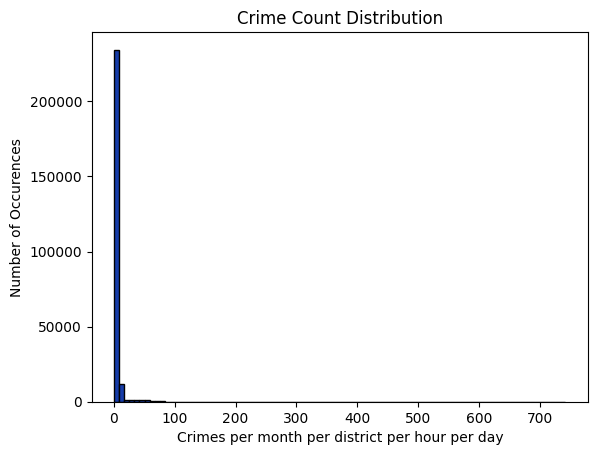

In [147]:
plt.hist(x='Accused_Count_Count', data=cri5,bins=90,linewidth=1,edgecolor='black', color='#163ca9')
#plt.title("Distribution of Crimes in Chicago", fontfamily="Agency FB", fontsize=25)
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Number of Occurences")
plt.title("Crime Count Distribution")
# plt.savefig("../results/plots/Distribution of crimes.png")

In [148]:
print(cri5['Accused_Count_Count'].value_counts())

Accused_Count_Count
1      56429
2      51190
3      37304
4      29269
5      20893
       ...  
648        1
281        1
275        1
605        1
153        1
Name: count, Length: 205, dtype: int64


In [149]:

from sklearn.utils import resample # for upsampling

# Set individual classes
cri5_low = cri5[cri5['Accused_Count_Count']<=1]
cri5_medium = cri5[cri5['Accused_Count_Count']==2]
cri5_high = cri5[cri5['Accused_Count_Count']>2]
# Upsample the minority classes to size of class 1 (medium)
cri5_low_upsampled = resample(cri5_low, 
                                 replace=True,     # sample with replacement
                                 n_samples=10000,    # to match majority class
                                 random_state=101) 

cri5_medium_upsampled = resample(cri5_medium, 
                                 replace=True,     # sample with replacement
                                 n_samples=5000,    # to match majority class
                                 random_state=101)

# Combine majority class with upsampled minority class
cri6_upsampled = pd.concat([cri5_medium_upsampled, cri5_low_upsampled, cri5_high])

Text(0.5, 1.0, 'Crime Count Distribution')

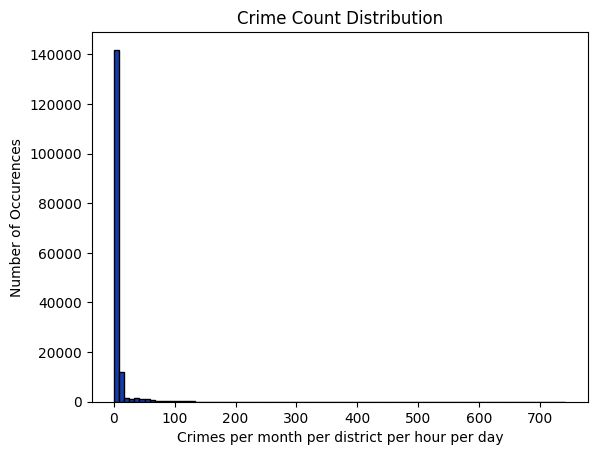

In [150]:
plt.hist(x='Accused_Count_Count', data=cri6_upsampled,bins=90,linewidth=1,edgecolor='black', color='#163ca9')
#plt.title("Distribution of Crimes in Chicago", fontfamily="Agency FB", fontsize=25)
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Number of Occurences")
plt.title("Crime Count Distribution")
# plt.savefig("../results/plots/Distribution of crimes.png")

In [151]:
cri6_upsampled.shape

(161771, 6)

In [152]:
cri6_upsampled.columns

Index(['Month', 'Day_Offence_From', 'District_Name_encoded',
       'Hour_Offence_From', 'Accused_Count_Count', 'Accused_Count_Sum'],
      dtype='object')

In [153]:
def crime_rate_assign(count, total_sum):
    if count <= 1 and total_sum <= 3:
        return 0
    elif (count > 1 and count <= 3) or (total_sum > 3 and total_sum <= 7):
        return 1
    else:
        return 2
cri6_upsampled['Alarm'] = cri6_upsampled.apply(lambda row: crime_rate_assign(row['Accused_Count_Count'], row['Accused_Count_Sum']), axis=1)
cri6 = cri6_upsampled[['Month', 'Day_Offence_From', 'District_Name_encoded', 'Hour_Offence_From',
       'Accused_Count_Count', 'Accused_Count_Sum', 'Alarm']]    
cri6.head()


,Month,Day_Offence_From,District_Name_encoded,Hour_Offence_From,Accused_Count_Count,Accused_Count_Sum,Alarm
94734,5,12,3,5,2,2,1
197191,10,8,27,23,2,29,1
115049,6,10,27,1,2,0,1
198664,10,10,35,5,2,3,1
22370,2,1,37,9,2,3,1


<Axes: >

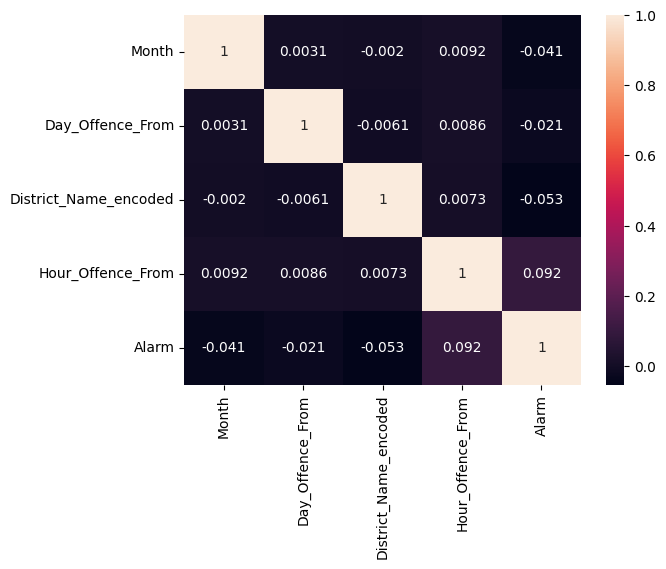

In [154]:
import seaborn as sns
temp = cri6[['Month', 'Day_Offence_From', 'District_Name_encoded', 'Hour_Offence_From','Alarm']]
sns.heatmap(temp.corr(), annot=True)

In [155]:
cri6['Alarm'].value_counts()

Alarm
2    86150
1    67288
0     8333
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Imbalance')

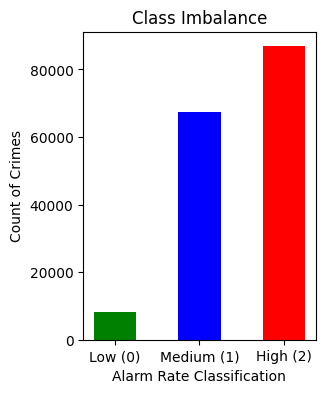

In [156]:
x=['Low (0)','Medium (1)','High (2)']
y=[8229,67322
, 86814
]
fig, ax = plt.subplots(figsize=(3, 4))
plt.bar(x,y, color=['green', 'blue', 'red'], width=0.5)
# plt.title('THE IMBALANCE IN THE DATASET')
plt.xlabel('Alarm Rate Classification')
plt.ylabel('Count of Crimes')
plt.title("Class Imbalance")

In [157]:
cri6

,Month,Day_Offence_From,District_Name_encoded,Hour_Offence_From,Accused_Count_Count,Accused_Count_Sum,Alarm
94734,5,12,3,5,2,2,1
197191,10,8,27,23,2,29,1
115049,6,10,27,1,2,0,1
198664,10,10,35,5,2,3,1
22370,2,1,37,9,2,3,1
...,...,...,...,...,...,...,...
240600,12,11,0,22,3,1,1
240601,12,11,0,23,4,11,2
170221,8,30,0,0,6,31,2
170225,8,30,0,8,3,6,1


In [158]:
# Using Decision Trees for classification (Imbalanced Dataset)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

X = cri6[['Month', 'Day_Offence_From', 'District_Name_encoded', 'Hour_Offence_From']] # independent
y = cri6['Alarm'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 75:25 split

# print(X_train)
# print('hi')
# print(X_test)
# Creating tree
d_tree = DecisionTreeClassifier(random_state=101)
# Fitting tree
d_tree = d_tree.fit(X_train, y_train)
# Predicting !
y_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy: 54.568157653982155 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1      2
Actual Alarm                      
0                 608   954    498
1                1138  8168   7589
2                 611  7584  13293

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.26      0.30      0.28      2060
           1       0.49      0.48      0.49     16895
           2       0.62      0.62      0.62     21488

    accuracy                           0.55     40443
   macro avg       0.46      0.47      0.46     40443
weighted avg       0.55      0.55      0.55     40443



In [160]:
cri6[(cri6['Month'] == 12) & (cri6['Day_Offence_From'] == 27 )]

,Month,Day_Offence_From,District_Name_encoded,Hour_Offence_From,Accused_Count_Count,Accused_Count_Sum,Alarm
251795,12,27,36,16,2,8,1
251604,12,27,26,15,2,0,1
251581,12,27,25,7,2,2,1
251549,12,27,22,23,2,6,1
251572,12,27,24,12,2,0,1
...,...,...,...,...,...,...,...
251222,12,27,0,22,3,12,1
251219,12,27,0,19,6,9,2
251218,12,27,0,18,5,2,2
251217,12,27,0,17,5,5,1


In [163]:
cri6.columns

Index(['Month', 'Day_Offence_From', 'District_Name_encoded',
       'Hour_Offence_From', 'Accused_Count_Count', 'Accused_Count_Sum',
       'Alarm'],
      dtype='object')

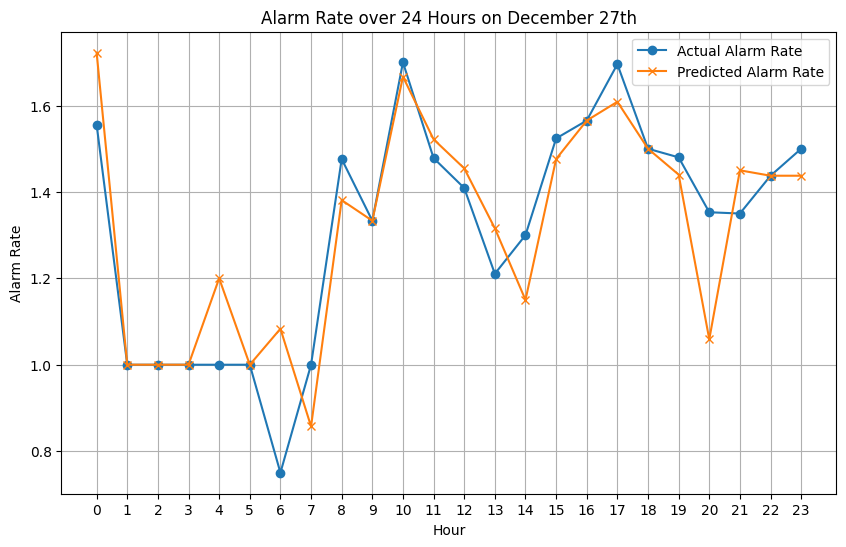

In [175]:
import matplotlib.pyplot as plt

# Filter data for December 27th
actual_dec27 = cri6[(cri6['Month'] == 12) & (cri6['Day_Offence_From'] == 7) ]
predicted_dec27 = actual_dec27.copy()  # Copying the structure of actual_dec27

# Group data by hour and calculate alarm rate for actual data
actual_alarm_rate = actual_dec27.groupby('Hour_Offence_From')['Alarm'].mean()

# Group data by hour and calculate alarm rate for predicted data
predicted_dec27['Alarm'] = d_tree.predict(predicted_dec27[['Month', 'Day_Offence_From', 'District_Name_encoded', 'Hour_Offence_From']])  # Predict alarm for each hour
predicted_alarm_rate = predicted_dec27.groupby('Hour_Offence_From')['Alarm'].mean()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(actual_alarm_rate.index, actual_alarm_rate.values, label='Actual Alarm Rate', marker='o')
plt.plot(predicted_alarm_rate.index, predicted_alarm_rate.values, label='Predicted Alarm Rate', marker='x')

plt.title('Alarm Rate over 24 Hours on December 27th')
plt.xlabel('Hour')
plt.ylabel('Alarm Rate')
plt.xticks(range(24))
plt.legend()
plt.grid(True)

plt.show()


In [176]:
from joblib import dump

# Save the model
dump(d_tree, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

## BEAT ANALYSIS AND MODEL


In [177]:
df2.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg',
       'UnitName_encoded', 'Unit_Beat', 'Unit_Beat_encoded',
       'District_Name_encoded', 'Village_Area_Name_encoded'],
      dtype='object'

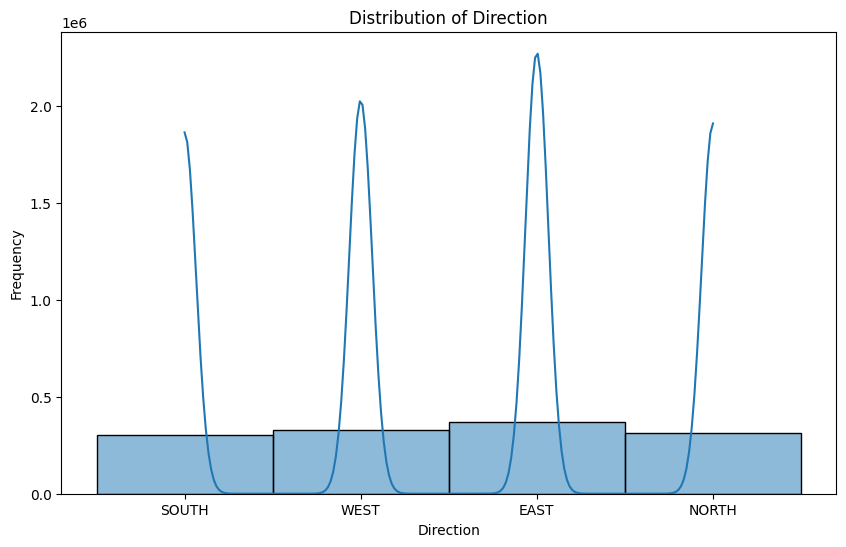

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your DataFrame and 'Distance' is the column you want to plot
# Check if the 'Distance' column contains any NaN values and handle them

# Now, plot the distribution of the 'Distance' column
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.histplot(df2['Direction'], kde=True)  # histplot with a Kernel Density Estimate (KDE)

# Adding labels and title for clarity
plt.xlabel('Direction')
plt.ylabel('Frequency')
plt.title('Distribution of Direction')
plt.show()


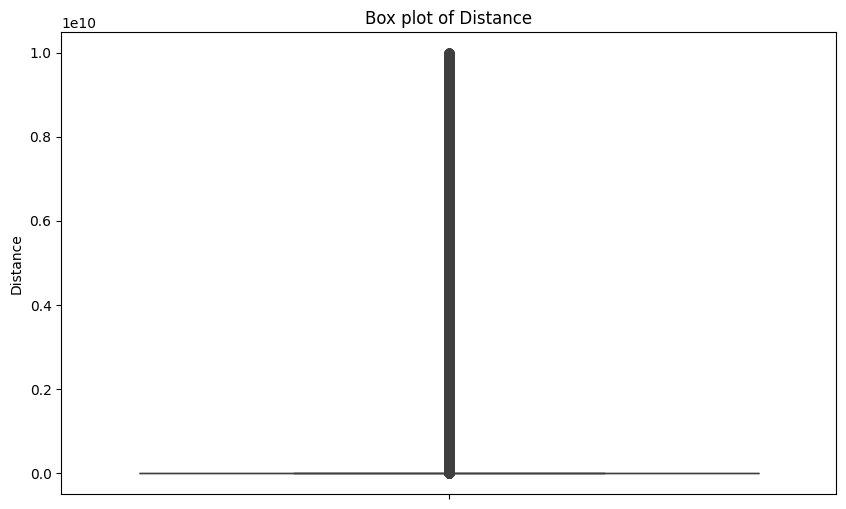

In [192]:
import seaborn as sns

# Assuming df2 is your DataFrame and 'Distance' is the column you want to plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2['Distance'])
plt.title('Box plot of Distance')
plt.ylabel('Distance')
plt.show()


In [193]:
df2['Distance'].median()

count    1.316099e+06
mean     2.218396e+08
std      1.196199e+09
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.200000e+01
max      9.986161e+09
Name: Distance, dtype: float64

In [203]:
# Calculate the 90th percentile of the 'Distance' column
percentile_90 = df2['Distance'].quantile(0.90)

# Filter the DataFrame to keep only rows where 'Distance' is less than or equal to the 90th percentile value
df2_reduced = df2[df2['Distance'] <= percentile_90]


In [204]:
df2_reduced.shape

(1186489, 56)

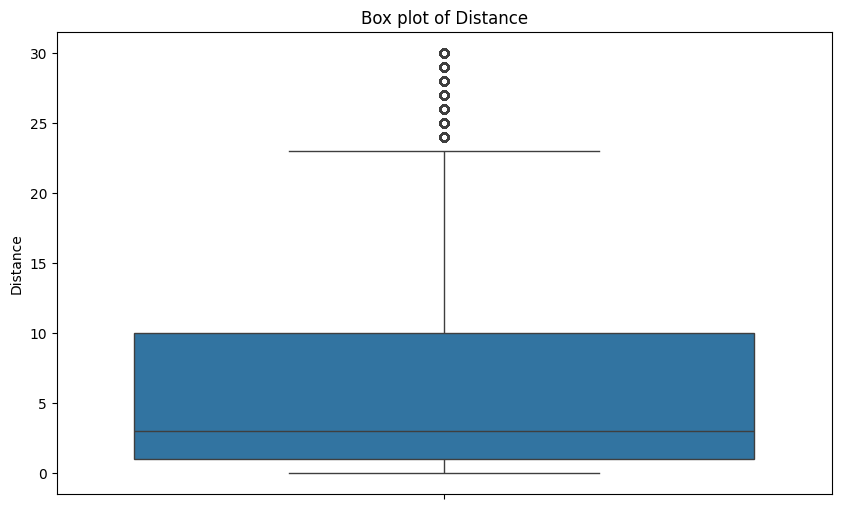

In [205]:
import seaborn as sns

# Assuming df2 is your DataFrame and 'Distance' is the column you want to plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2_reduced['Distance'])
plt.title('Box plot of Distance')
plt.ylabel('Distance')
plt.show()


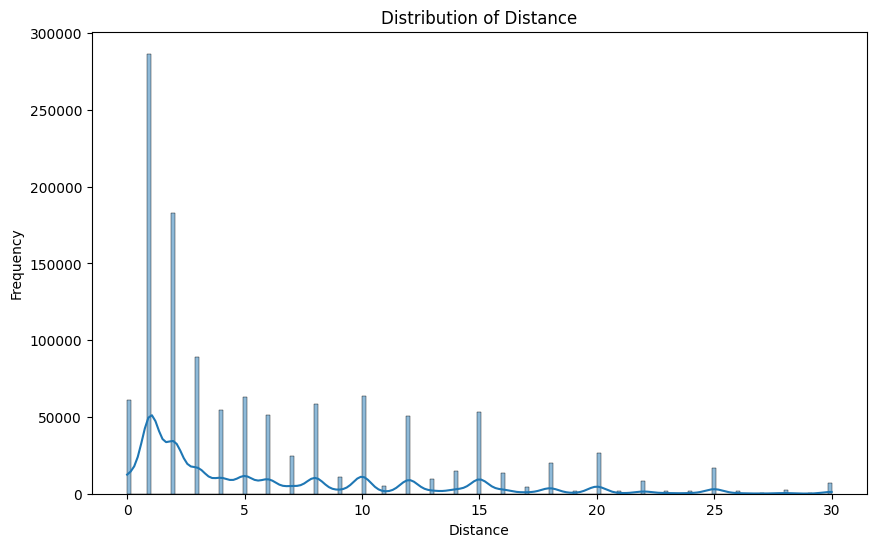

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your DataFrame and 'Distance' is the column you want to plot
# Check if the 'Distance' column contains any NaN values and handle them

# Now, plot the distribution of the 'Distance' column
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.histplot(df2_reduced['Distance'], kde=True)  # histplot with a Kernel Density Estimate (KDE)

# Adding labels and title for clarity
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')
plt.show()


In [206]:
upper_limit = df2_reduced['Distance'].quantile(0.85)
lower_limit = df2_reduced['Distance'].quantile(0.05)
df2_reduced['Distance_Clipped'] = df2_reduced['Distance'].clip(lower=lower_limit, upper=upper_limit)


C:\Users\dutta\AppData\Local\Temp\ipykernel_28864\643353715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_reduced['Distance_Clipped'] = df2_reduced['Distance'].clip(lower=lower_limit, upper=upper_limit)


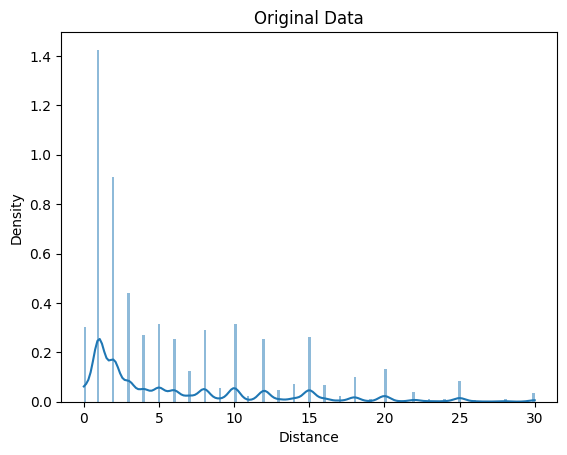

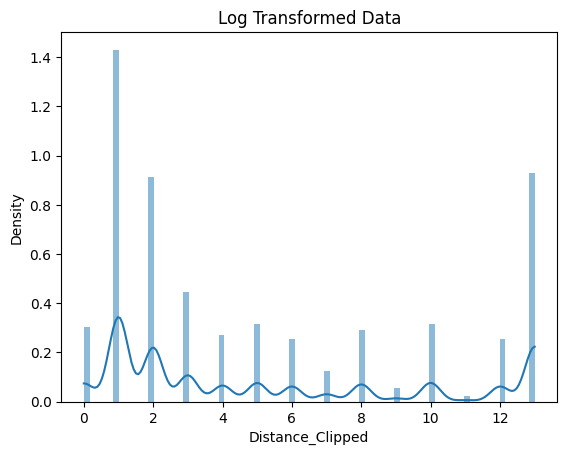

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original Data
sns.histplot(df2_reduced['Distance'], kde=True, stat="density", linewidth=0)
plt.title('Original Data')
plt.show()

# Log Transformation
sns.histplot(df2_reduced['Distance_Clipped'], kde=True, stat="density", linewidth=0)
plt.title('Log Transformed Data')
plt.show()

# And so on for each transformation...


In [209]:
df2_reduced.head()

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,Minute_Offence_To,Day_FIR_Reg,Hour_FIR_Reg,Minute_FIR_Reg,UnitName_encoded,Unit_Beat,Unit_Beat_encoded,District_Name_encoded,Village_Area_Name_encoded,Distance_Clipped
0,Bagalkot,Amengad PS,0009/2016,1,2016,1,2016-01-20 22:00:00,2016-01-20 22:05:00,2016-01-21 01:00:00,21/01/2016,...,5.0,21,1,0,0,Amengad PS_RURAL BEAT NO 3,494,0,156,11.0
1,Bagalkot,Amengad PS,0101/2016,1,2016,6,2016-06-15 23:00:00,2016-06-16 06:00:00,2016-06-16 12:30:00,16/06/2016,...,0.0,16,12,30,0,Amengad PS_GUDUR TOWN BEAT NO 21,482,0,4881,13.0
4,Bagalkot,Amengad PS,0142/2016,1,2016,8,2016-08-20 15:45:00,2016-08-20 15:50:00,2016-08-20 17:00:00,20/08/2016,...,50.0,20,17,0,0,Amengad PS_RURAL BEAT NO 3,494,0,156,8.0
6,Bagalkot,Amengad PS,0149/2018,1,2018,7,2018-07-26 10:45:00,2018-07-26 10:50:00,2018-07-26 13:00:00,26/07/2018,...,50.0,26,13,0,0,Amengad PS_RURAL BEAT NO 16,489,0,9932,13.0
7,Bagalkot,Amengad PS,0152/2018,1,2018,7,2018-07-02 23:00:00,2018-07-03 06:00:00,2018-07-28 17:30:00,28/07/2018,...,0.0,28,17,30,0,Amengad PS_RURAL BEAT NO 3,494,0,156,10.0


In [232]:
bri5 = df2_reduced.groupby(
    ['Year', 'Month', 'Day_Offence_From', 'UnitName_encoded', 'Unit_Beat_encoded'], as_index=False
).agg(
    {
        "Accused Count": ["count", "sum"],  # Count and sum for 'Accused Count'
        "Distance": ["mean","median"]  # Mean for 'Distance'
    }
)

# Renaming columns for clarity
bri5.columns = ['Year', 'Month', 'Day_Offence_From', 'UnitName_encoded', 'Unit_Beat_encoded', 
                'Accused_Count_Count', 'Accused_Count_Sum', 'Distance_Mean','Distance_Median']


In [233]:
bri5.head()

,Year,Month,Day_Offence_From,UnitName_encoded,Unit_Beat_encoded,Accused_Count_Count,Accused_Count_Sum,Distance_Mean,Distance_Median
0,2016,1,1,3,1353,1,12,9.0,9.0
1,2016,1,1,8,3122,1,0,18.0,18.0
2,2016,1,1,8,3123,2,16,15.0,15.0
3,2016,1,1,8,3131,1,2,4.0,4.0
4,2016,1,1,10,8286,1,0,1.0,1.0


In [234]:
bri5['Distance_Mean']

0          9.0
1         18.0
2         15.0
3          4.0
4          1.0
          ... 
886734     5.0
886735     6.0
886736     8.0
886737     2.0
886738    12.0
Name: Distance_Mean, Length: 886739, dtype: float64

In [245]:
# Sample thresholds - modify these based on your data analysis
high_threshold_count = bri5['Accused_Count_Count'].quantile(0.75)  # Adjust based on your data
high_threshold_sum = bri5['Accused_Count_Sum'].quantile(0.75)  # Adjust based on your data
high_threshold_distance = bri5['Distance_Mean'].quantile(0.75)  # Adjust based on your data
low_threshold_count = bri5['Accused_Count_Count'].quantile(0.25)  # Adjust based on your data
low_threshold_sum = bri5['Accused_Count_Sum'].quantile(0.25)  # Adjust based on your data
low_threshold_distance = bri5['Distance_Mean'].quantile(0.25)  # Adjust based on your data
# Ensure thresholds are scalars.
print(high_threshold_count, high_threshold_sum, high_threshold_distance)
print(low_threshold_count, low_threshold_sum, low_threshold_distance)

def determine_patrolling_category(accused_count_count, accused_count_sum, distance_mean):
    # Explicitly confirm we're getting scalars
    # print(f"Processing: {accused_count_count}, {accused_count_sum}, {distance_mean}")
    
    if accused_count_count >= high_threshold_count or accused_count_sum >= high_threshold_sum:
        return 0 if distance_mean >= high_threshold_distance else 1
    elif accused_count_sum < high_threshold_sum and accused_count_sum > low_threshold_sum:
        return 2 if distance_mean >= high_threshold_distance else 3
    return 4

# Apply the function across each row with scalar inputs confirmed
bri5['Patrolling_Category'] = bri5.apply(
    lambda row: determine_patrolling_category(row['Accused_Count_Count'], row['Accused_Count_Sum'], row['Distance_Mean']), 
    axis=1
)



2.0 3.0 10.0
1.0 0.0 1.0


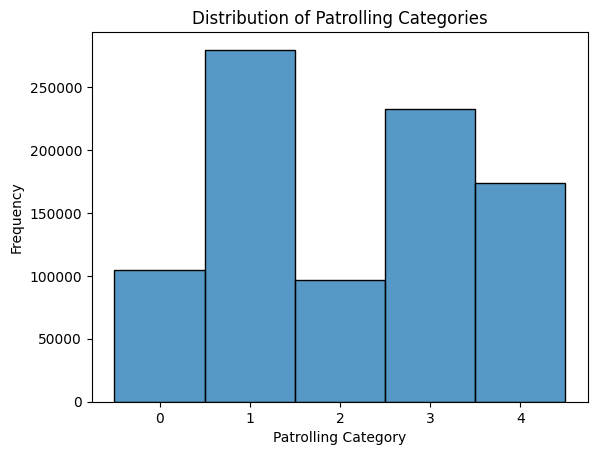

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bri5['Patrolling_Category'] is properly populated
sns.histplot(data=bri5, x='Patrolling_Category', discrete=True)
plt.title('Distribution of Patrolling Categories')
plt.xlabel('Patrolling Category')
plt.ylabel('Frequency')
plt.show()


In [247]:
bri5['Patrolling_Category'].unique()

array([1, 4, 0, 3, 2], dtype=int64)

In [248]:
bri5.columns

Index(['Year', 'Month', 'Day_Offence_From', 'UnitName_encoded',
       'Unit_Beat_encoded', 'Accused_Count_Count', 'Accused_Count_Sum',
       'Distance_Mean', 'Distance_Median', 'Patrolling_Category'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix
corr = bri5.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [249]:
# Using Decision Trees for classification (Imbalanced Dataset)

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

X = bri5[['Year','Month', 'Day_Offence_From', 'UnitName_encoded', 'Unit_Beat_encoded']] # independent
Y = bri5['Patrolling_Category'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101) # 75:25 split

# print(X_train)
# print('hi')
# print(X_test)
# Creating tree
d_tree_beat = DecisionTreeClassifier(random_state=101)
# Fitting tree
d_tree_beat = d_tree_beat.fit(X_train, y_train)
# Predicting !
y_pred = d_tree_beat.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Patrolling_Category'], colnames=['Patrolling_Category'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy: 36.7025283623159 


----------Confusion Matrix------------------------------------
Patrolling_Category            0      1     2      3      4
Actual Patrolling_Category                                 
0                           9577   2560  7815   2221   3956
1                           2709  32468  2118  20060  12738
2                           8017   2307  7896   2232   3738
3                           2445  21957  2433  21352   9816
4                           4404  14949  3827  10019  10071

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.35      0.37      0.36     26129
           1       0.44      0.46      0.45     70093
           2       0.33      0.33      0.33     24190
           3       0.38      0.37      0.37     58003
           4       0.25      0.23      0.24     43270

    accuracy                           0.37    221685
   macro avg       0.35      0.35     

In [251]:
from sklearn.neighbors import KNeighborsClassifier

# Splitting the dataset into the Training set and Test set was already done for the Decision Tree

# Creating KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # The value for n_neighbors can be tuned

# Fitting KNN to the training set
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = knn.predict(X_test)

# Model Evaluation for KNN
print("KNN Accuracy:", (metrics.accuracy_score(y_test, y_pred_knn) * 100), "\n")

# Confusion Matrix for evaluating the KNN model
cm_knn = pd.crosstab(y_test, y_pred_knn, rownames=['Actual Patrolling_Category'], colnames=['Predicted Patrolling_Category'])
print("\n----------KNN Confusion Matrix------------------------------------")
print(cm_knn)

# Classification Report for KNN
print("\n----------KNN Classification Report------------------------------------")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 25.101833682928483 


----------KNN Confusion Matrix------------------------------------
Predicted Patrolling_Category     0      1     2      3     4
Actual Patrolling_Category                                   
0                              3183  11838  1681   6326  3101
1                              8883  31653  4399  17049  8109
2                              3053  10927  1539   5918  2753
3                              7278  26017  3791  14235  6682
4                              5457  19474  2840  10462  5037

----------KNN Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.11      0.12      0.12     26129
           1       0.32      0.45      0.37     70093
           2       0.11      0.06      0.08     24190
           3       0.26      0.25      0.25     58003
           4       0.20      0.12      0.15     43270

    accuracy                           0.25    221685
   macro a

In [252]:
from sklearn.ensemble import RandomForestClassifier

# Creating Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)  # The number of trees in the forest, n_estimators, can be tuned

# Fitting Random Forest to the training set
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = rf_classifier.predict(X_test)

# Model Evaluation for Random Forest
print("Random Forest Accuracy:", (metrics.accuracy_score(y_test, y_pred_rf) * 100), "\n")

# Confusion Matrix for evaluating the Random Forest model
cm_rf = pd.crosstab(y_test, y_pred_rf, rownames=['Actual Patrolling_Category'], colnames=['Predicted Patrolling_Category'])
print("\n----------Random Forest Confusion Matrix------------------------------------")
print(cm_rf)

# Classification Report for Random Forest
print("\n----------Random Forest Classification Report------------------------------------")
print(classification_report(y_test, y_pred_rf))


MemoryError: could not allocate 67108864 bytes

In [250]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming bri5 is your pre-processed DataFrame
X = bri5[['Month', 'Day_Offence_From', 'UnitName_encoded', 'Unit_Beat_encoded']].values
Y = bri5['Patrolling_Category'].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# One-Hot Encoding the dependent variable if it's categorical and not ordinal
ohe = OneHotEncoder()
Y_train = ohe.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test = ohe.transform(Y_test.reshape(-1, 1)).toarray()

# Initializing the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))

# Adding the second hidden layer
model.add(Dense(units=6, activation='relu'))

# Adding the output layer
num_labels = Y_train.shape[1]
model.add(Dense(units=num_labels, activation='softmax'))

# Compiling the ANN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the ANN on the Training set
model.fit(X_train, Y_train, batch_size=10, epochs=20)

# Making predictions and evaluating the model
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

# Converting predictions and actual values from one-hot encoded to label encoded for evaluation purposes
Y_test_class = np.argmax(Y_test, axis=1)
Y_pred_class = np.argmax(Y_pred, axis=1)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test_class, Y_pred_class)
print(cm)
accuracy = accuracy_score(Y_test_class, Y_pred_class)
print("Accuracy: {:.2f}%".format(accuracy * 100))





Epoch 1/100


66506/66506 [==============================] - 91s 1ms/step - loss: 1.4777 - accuracy: 0.3134
Epoch 2/100
66506/66506 [==============================] - 90s 1ms/step - loss: 1.4589 - accuracy: 0.3149
Epoch 3/100
66506/66506 [==============================] - 92s 1ms/step - loss: 1.4572 - accuracy: 0.3155
Epoch 4/100
66506/66506 [==============================] - 92s 1ms/step - loss: 1.4565 - accuracy: 0.3155
Epoch 5/100
19121/66506 [=======>......................] - ETA: 1:04 - loss: 1.4577 - accuracy: 0.3148

KeyboardInterrupt: 